In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from datasets import load_data
from model import model_summary,S8_Model_GN
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('S8/util.py')
from util import test, train, plot_acc_loss
sys.path.append('S8/datasets.py')
from datasets import load_data
device = torch.device( 'cuda' if torch.cuda.is_available() else 'cpu')
print(device)

c:\Users\Aai\anaconda3\envs\pytorch\Lib\site-packages\transformers\utils\generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


cuda


In [4]:
train_loader,test_loader = load_data()

Files already downloaded and verified
Files already downloaded and verified


In [11]:
model = S8_Model_GN(group_number=4).to(device)
model_summary(model,input_size= (3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]           4,704
         GroupNorm-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           9,216
         GroupNorm-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 16, 32, 32]             528
        MaxPool2d-10           [-1, 16, 31, 31]               0
           Conv2d-11           [-1, 12, 31, 31]           1,728
        GroupNorm-12           [-1, 12, 31, 31]              24
             ReLU-13           [-1, 12, 31, 31]               0
          Dropout-14           [-1, 12,

In [12]:

criterion = F.nll_loss
num_epochs = 20
optimizer_sgd = optim.SGD(model.parameters(), lr=0.01,momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer_sgd,gamma=0.99,step_size=5)


for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_sgd,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




Epoch 1


Train: Loss=1.9596 Batch_id=97 Accuracy=17.66: 100%|██████████| 98/98 [00:21<00:00,  4.46it/s]


Test set: Average loss: 0.0039, Accuracy: 2328/10000 (23.28%)

Epoch 2


Train: Loss=1.9016 Batch_id=97 Accuracy=24.40: 100%|██████████| 98/98 [00:22<00:00,  4.39it/s]


Test set: Average loss: 0.0037, Accuracy: 2798/10000 (27.98%)

Epoch 3


Train: Loss=1.7954 Batch_id=97 Accuracy=29.85: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]


Test set: Average loss: 0.0036, Accuracy: 3055/10000 (30.55%)

Epoch 4


Train: Loss=1.7663 Batch_id=97 Accuracy=32.48: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0035, Accuracy: 3305/10000 (33.05%)

Epoch 5


Train: Loss=1.7236 Batch_id=97 Accuracy=35.55: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]


Test set: Average loss: 0.0038, Accuracy: 2878/10000 (28.78%)

Epoch 6


Train: Loss=1.5993 Batch_id=97 Accuracy=37.78: 100%|██████████| 98/98 [00:20<00:00,  4.80it/s]


Test set: Average loss: 0.0035, Accuracy: 3268/10000 (32.68%)

Epoch 7


Train: Loss=1.5766 Batch_id=97 Accuracy=40.80: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.0035, Accuracy: 3446/10000 (34.46%)

Epoch 8


Train: Loss=1.4344 Batch_id=97 Accuracy=42.56: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.0033, Accuracy: 3687/10000 (36.87%)

Epoch 9


Train: Loss=1.4778 Batch_id=97 Accuracy=44.75: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.0029, Accuracy: 4585/10000 (45.85%)

Epoch 10


Train: Loss=1.5152 Batch_id=97 Accuracy=46.37: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]


Test set: Average loss: 0.0029, Accuracy: 4576/10000 (45.76%)

Epoch 11


Train: Loss=1.5126 Batch_id=97 Accuracy=47.51: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]


Test set: Average loss: 0.0030, Accuracy: 4472/10000 (44.72%)

Epoch 12


Train: Loss=1.3206 Batch_id=97 Accuracy=49.13: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.0028, Accuracy: 4712/10000 (47.12%)

Epoch 13


Train: Loss=1.2227 Batch_id=97 Accuracy=49.95: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]


Test set: Average loss: 0.0032, Accuracy: 4165/10000 (41.65%)

Epoch 14


Train: Loss=1.2956 Batch_id=97 Accuracy=51.63: 100%|██████████| 98/98 [00:20<00:00,  4.87it/s]


Test set: Average loss: 0.0032, Accuracy: 4243/10000 (42.43%)

Epoch 15


Train: Loss=1.2363 Batch_id=97 Accuracy=51.85: 100%|██████████| 98/98 [00:20<00:00,  4.73it/s]


Test set: Average loss: 0.0026, Accuracy: 5138/10000 (51.38%)

Epoch 16


Train: Loss=1.2075 Batch_id=97 Accuracy=53.02: 100%|██████████| 98/98 [00:21<00:00,  4.48it/s]


Test set: Average loss: 0.0030, Accuracy: 4537/10000 (45.37%)

Epoch 17


Train: Loss=1.1791 Batch_id=97 Accuracy=54.09: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0028, Accuracy: 4700/10000 (47.00%)

Epoch 18


Train: Loss=1.1903 Batch_id=97 Accuracy=55.42: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0027, Accuracy: 5062/10000 (50.62%)

Epoch 19


Train: Loss=1.2498 Batch_id=97 Accuracy=55.40: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0028, Accuracy: 4873/10000 (48.73%)

Epoch 20


Train: Loss=1.1508 Batch_id=97 Accuracy=56.66: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0027, Accuracy: 5247/10000 (52.47%)



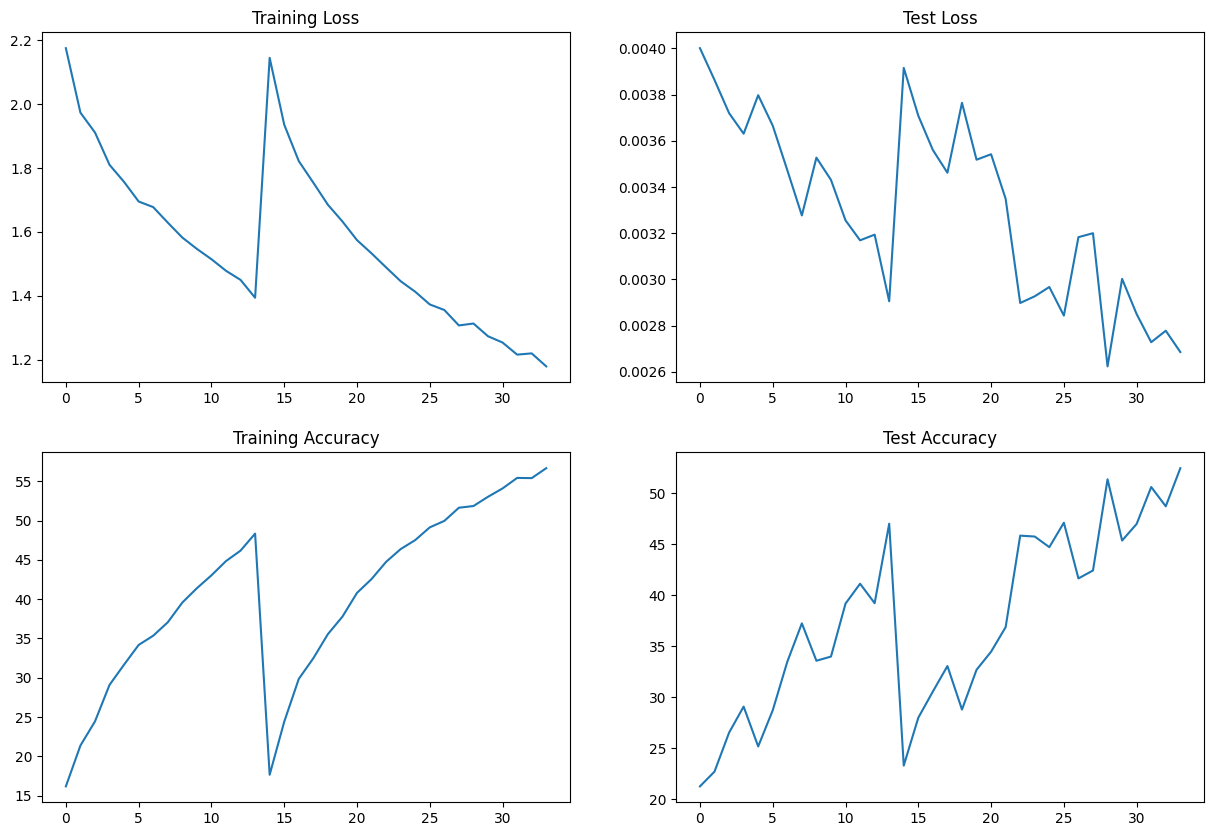

In [13]:
plot_acc_loss()

In [15]:
STEPS_PER_EPOCH =int(len(train_loader)*1)
print(f'STEPS_PER_EPOCH {STEPS_PER_EPOCH}')
optimizer_adam = optim.Adam(model.parameters(), lr=0.02,weight_decay=0.001)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer_adam,max_lr=0.1,epochs=num_epochs,steps_per_epoch=STEPS_PER_EPOCH)
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer_adam,criterion)
  test(model, device, test_loader, criterion)
  scheduler.step()




STEPS_PER_EPOCH 98
Epoch 1


Train: Loss=1.9178 Batch_id=97 Accuracy=19.33: 100%|██████████| 98/98 [00:22<00:00,  4.42it/s]


Test set: Average loss: 0.0037, Accuracy: 2683/10000 (26.83%)

Epoch 2


Train: Loss=1.7649 Batch_id=97 Accuracy=28.84: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0035, Accuracy: 3153/10000 (31.53%)

Epoch 3


Train: Loss=1.7166 Batch_id=97 Accuracy=32.89: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0034, Accuracy: 3348/10000 (33.48%)

Epoch 4


Train: Loss=1.5458 Batch_id=97 Accuracy=37.47: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


Test set: Average loss: 0.0033, Accuracy: 3773/10000 (37.73%)

Epoch 5


Train: Loss=1.4809 Batch_id=97 Accuracy=41.87: 100%|██████████| 98/98 [00:21<00:00,  4.66it/s]


Test set: Average loss: 0.0030, Accuracy: 4286/10000 (42.86%)

Epoch 6


Train: Loss=1.4737 Batch_id=97 Accuracy=46.61: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0028, Accuracy: 4827/10000 (48.27%)

Epoch 7


Train: Loss=1.2579 Batch_id=97 Accuracy=48.67: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]


Test set: Average loss: 0.0026, Accuracy: 5257/10000 (52.57%)

Epoch 8


Train: Loss=1.3412 Batch_id=97 Accuracy=51.20: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0026, Accuracy: 5258/10000 (52.58%)

Epoch 9


Train: Loss=1.1435 Batch_id=97 Accuracy=53.62: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0027, Accuracy: 4974/10000 (49.74%)

Epoch 10


Train: Loss=1.1779 Batch_id=97 Accuracy=54.71: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0024, Accuracy: 5707/10000 (57.07%)

Epoch 11


Train: Loss=1.2917 Batch_id=97 Accuracy=54.93: 100%|██████████| 98/98 [00:21<00:00,  4.60it/s]


Test set: Average loss: 0.0024, Accuracy: 5754/10000 (57.54%)

Epoch 12


Train: Loss=1.2067 Batch_id=97 Accuracy=55.86: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]


Test set: Average loss: 0.0025, Accuracy: 5556/10000 (55.56%)

Epoch 13


Train: Loss=1.1764 Batch_id=97 Accuracy=56.36: 100%|██████████| 98/98 [00:21<00:00,  4.65it/s]


Test set: Average loss: 0.0024, Accuracy: 5638/10000 (56.38%)

Epoch 14


Train: Loss=1.1696 Batch_id=97 Accuracy=58.40: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0023, Accuracy: 5889/10000 (58.89%)

Epoch 15


Train: Loss=1.1602 Batch_id=97 Accuracy=58.89: 100%|██████████| 98/98 [00:20<00:00,  4.70it/s]


Test set: Average loss: 0.0022, Accuracy: 6008/10000 (60.08%)

Epoch 16


Train: Loss=1.1289 Batch_id=97 Accuracy=58.80: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


Test set: Average loss: 0.0022, Accuracy: 5981/10000 (59.81%)

Epoch 17


Train: Loss=1.0819 Batch_id=97 Accuracy=59.54: 100%|██████████| 98/98 [00:21<00:00,  4.64it/s]


Test set: Average loss: 0.0023, Accuracy: 5992/10000 (59.92%)

Epoch 18


Train: Loss=1.1014 Batch_id=97 Accuracy=60.26: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0021, Accuracy: 6244/10000 (62.44%)

Epoch 19


Train: Loss=1.0223 Batch_id=97 Accuracy=60.41: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0022, Accuracy: 6000/10000 (60.00%)

Epoch 20


Train: Loss=1.0936 Batch_id=97 Accuracy=61.32: 100%|██████████| 98/98 [00:20<00:00,  4.69it/s]


Test set: Average loss: 0.0021, Accuracy: 6282/10000 (62.82%)



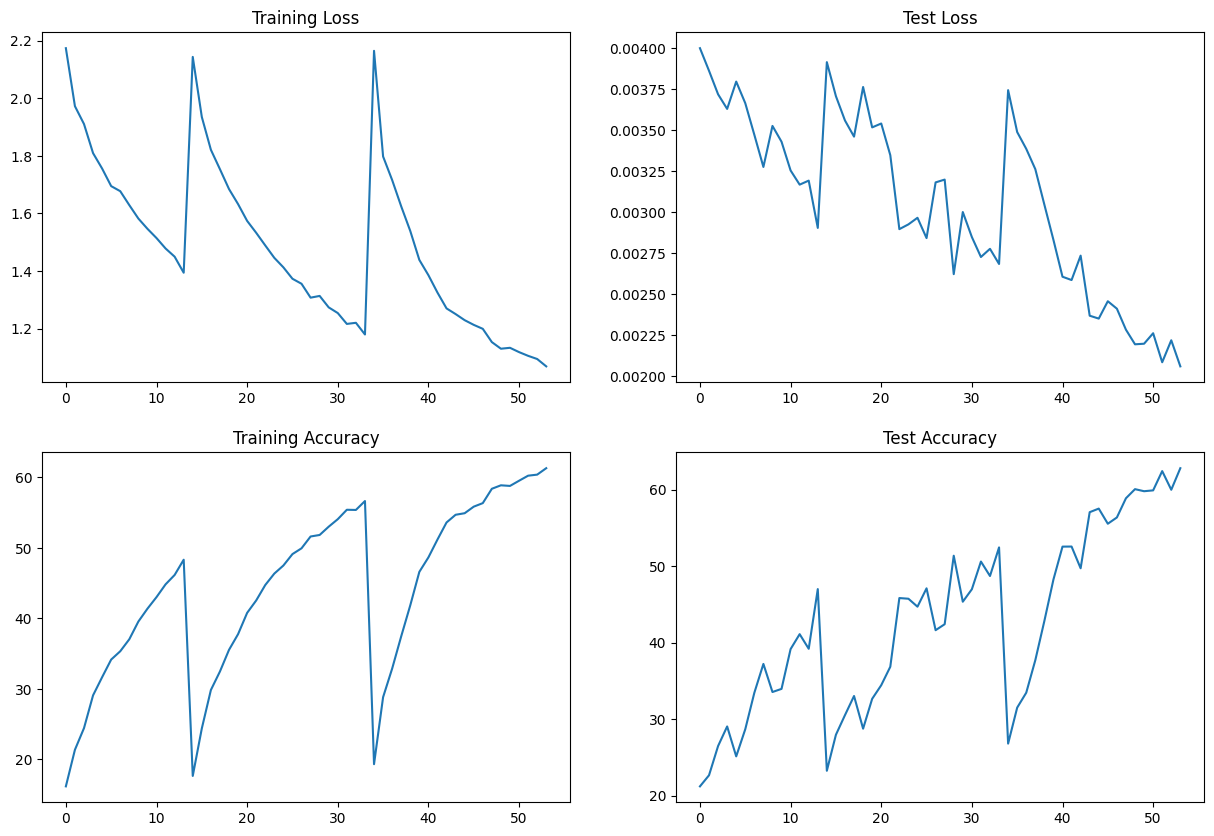

In [17]:
plot_acc_loss()

In [19]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

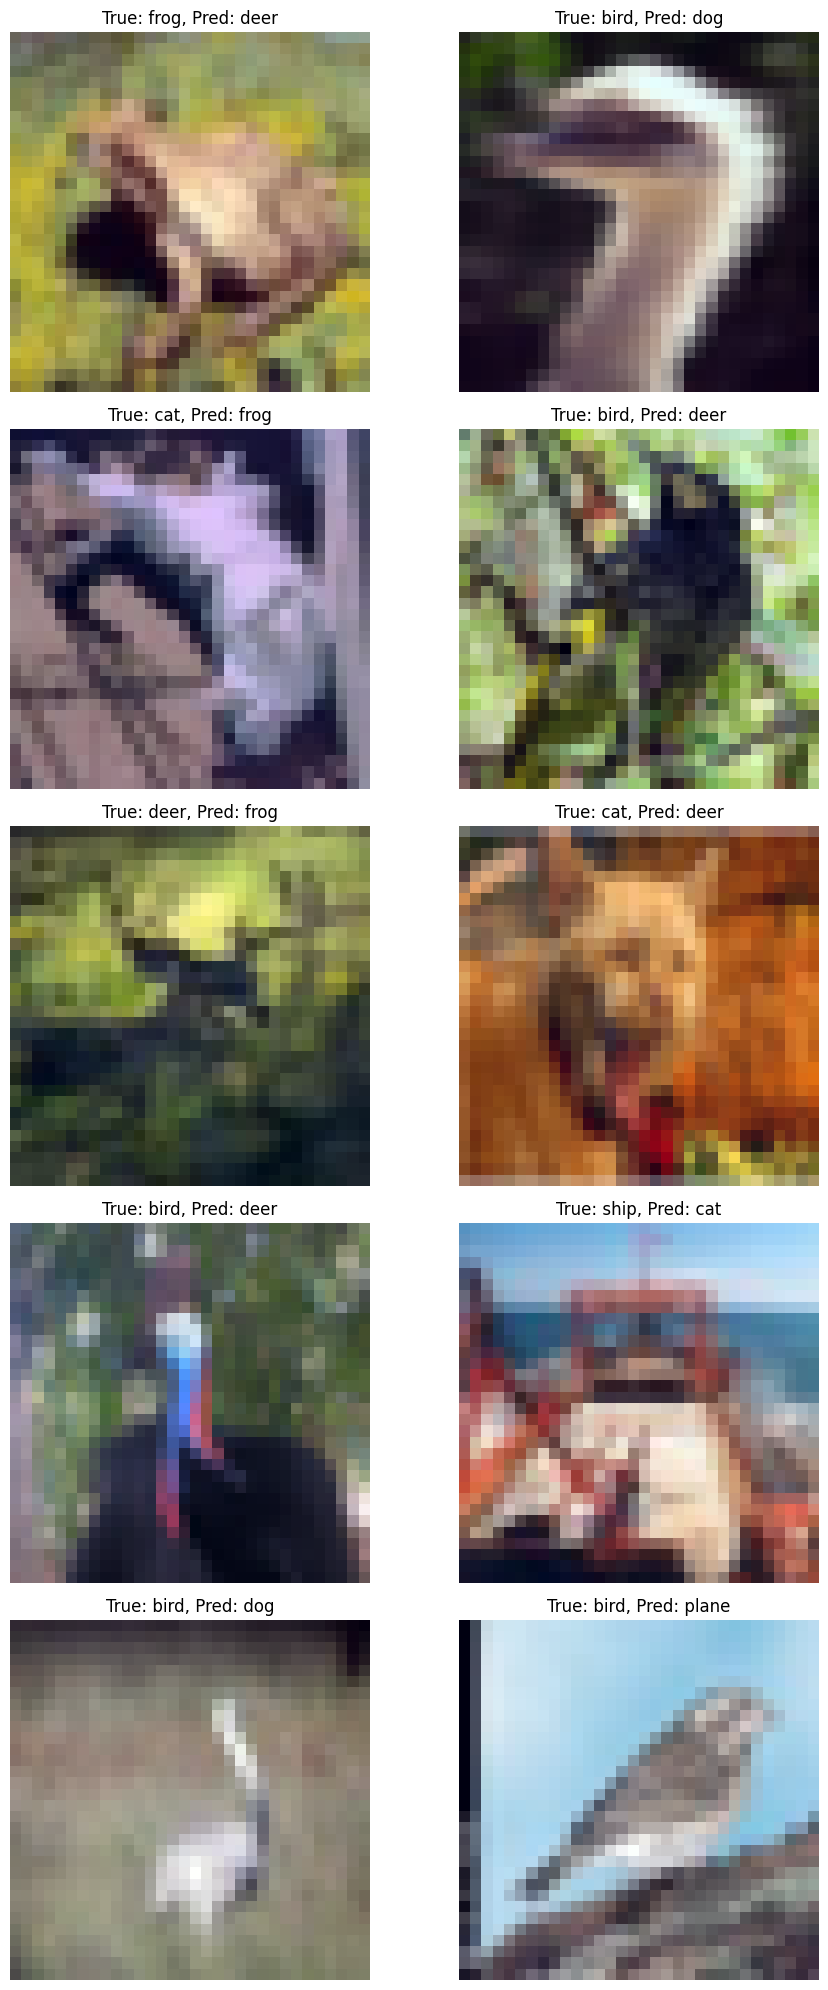

In [24]:
def find_and_visualize_misclassified_images(model, device, test_loader, criterion, classes, num_images=10):
    model.eval()  # Set the model to evaluation mode
    misclassified_images = []
    misclassified_true = []
    misclassified_pred = []

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            _, preds = torch.max(output, 1)
            misclassified_idxs = (preds != target).nonzero(as_tuple=False).squeeze()

            for idx in misclassified_idxs:
                if len(misclassified_images) < num_images:
                    misclassified_images.append(data[idx].cpu())
                    misclassified_true.append(target[idx].cpu())
                    misclassified_pred.append(preds[idx].cpu())
                else:
                    plot_misclassified_images(misclassified_images, misclassified_true, misclassified_pred, classes)
                    return
    if misclassified_images:
        plot_misclassified_images(misclassified_images, misclassified_true, misclassified_pred, classes)
import matplotlib.pyplot as plt

def plot_misclassified_images(images, true_labels, predicted_labels, classes):
    fig, axes = plt.subplots((len(images) + 1) // 2, 2, figsize=(10, 20))
    for i, ax in enumerate(axes.flat):
        if i < len(images):
            img = images[i].numpy().transpose((1, 2, 0))
            img = (img - img.min()) / (img.max() - img.min())  # Normalize to [0,1]
            ax.imshow(img)
            ax.set_title(f"True: {classes[true_labels[i].item()]}, Pred: {classes[predicted_labels[i].item()]}")
            ax.axis('off')
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()


# Assume 'model', 'device', 'test_loader', 'criterion', and 'classes' are already defined
find_and_visualize_misclassified_images(model, device, test_loader, criterion, classes)
